#**Process and Threads Synchronization in Python**

[Presentation on Processes, Threads and Synchronization](https://kfupmedusa-my.sharepoint.com/:p:/g/personal/ayaz_khan_kfupm_edu_sa/EXmljxkQgyJNmQImWCpwF7gBGfBRLsxSi2kHZSK0T8Qfmw?e=EvGUiP)

## **Data Inconsistency:**

Run the following program to print the ‘hi’ message and the age of that person at the same time. But since both the threads are executing simultaneously we will be getting an irregular output, hence making it difficult to know the age of Abdullah and Muhammad.

###**Concurrent Greetings with Python Threads**
The code uses the *threading* module to create and start two threads, *t1* and *t2*, which execute the *wish* function concurrently. The *wish* function takes two arguments, *name* and *age*, and prints a greeting message along with the name and age of a person.

Here's a breakdown of what the code does:


1. Import the *Thread* class and the *time* module from the *threading* library.
2. Define the *wish* function, which takes *name* and *age* as arguments.
3. In the *wish* function, loop three times, printing a greeting message with the provided name and then printing the age. It sleeps for 2 seconds between each iteration.
4. Create two *Thread* objects, *t1* and *t2*, each targeting the *wish* function with different name and age arguments.
5. Start both threads using the *start()* method.
6. Use the *join()* method on both threads to wait for them to finish executing before the program exits.

The result will be that the two threads, *t1* and *t2*, will run concurrently, and their output will be interleaved, as they share the same standard output. The program waits for both threads to complete before exiting due to the *join()* calls.

In [4]:
from threading import *
import time

def wish(name,age):
   for i in range(3):
       print("Hi",name," ", i)
       time.sleep(2)
       print("Your age is",age)

t1=Thread(target=wish, args=("Abullah",15))
t2=Thread(target=wish, args=("Muhammad",20))

t1.start()
t2.start()
t1.join()
t2.join()

Hi Abullah   0
Hi Muhammad   0
Your age isYour age is 15
Hi Abullah   1
 20
Hi Muhammad   1
Your age is 15
Hi Abullah   2
Your age is 20
Hi Muhammad   2
Your age is 15
Your age is 20


Data inconsistency can be a serious problem in the real life applications.

Let us take an example where we transfer some amount from one bank account to another using threads. We will create 100 threads to transfer 1 unit from account1 to account2.

Initially, account1 has 100 units and account2 has 0 units.

###**Concurrent Bank Account Transfers with Python Threads**
This Python code demonstrates a simple multithreading example for money transfers between two bank accounts (*account1* and *account2*). Here's a brief explanation of the code:

**1. BankAccount Class:**
* *BankAccount* is a class representing a bank account. It has two attributes: *name* (account holder's name) and *balance* (the amount of money in the account). There's also a *\_\_str\_\_* method to provide a string representation of the account (the account holder's name).

**2. Creating Bank Accounts:**
* Two bank account instances (*account1* and *account2*) are created with initial balances of \$100 and \$0, respectively.

**3. BankTransferThread Class:**
* *BankTransferThread* is a class that defines the behavior of a thread responsible for transferring money between accounts.
* It takes three parameters during initialization: *sender* (the sender's bank account), *receiver* (the receiver's bank account), and *amount* (the amount to transfer).

**4. Main Execution Block (if \_\_name\_\_ == "\_\_main\_\_":):**
* In the main block, the code performs the following steps:
* **Thread Creation:**
  * A list called *threads* is created to store instances of *BankTransferThread*.
  * A loop runs 100 times, creating 100 threads. Each thread represents a money transfer from *account1* to *account2*, transferring \$1 each time.
* **Thread Start:**
  * Another loop is used to start each thread. Starting a thread triggers the *run()* method of each thread, where the money transfer logic is implemented.
* **Thread Join:**
  * After starting all threads, the code waits for each thread to finish using the *join()* method. This ensures that all transfers are completed before proceeding.
* **Display Account Balances:**
  * Finally, the code prints the balances of *account1* and *account2* after all transfers are completed.

The use of threads allows multiple money transfers to occur concurrently, simulating concurrent bank transactions. However, this code does not include explicit synchronization mechanisms, which are essential in real banking systems to ensure data consistency and avoid race conditions. In practice, synchronization mechanisms like locks or semaphores would be needed for thread safety in such scenarios.

In [ ]:
from threading import *
import time

class BankAccount():
  def __init__(self, name, balance):
    self.name = name
    self.balance = balance

  def __str__(self):
    return self.name

# These accounts are our shared resources
account1 = BankAccount("account1", 100)
account2 = BankAccount("account2", 0)
l = Lock() # creating the lock object

class BankTransferThread(Thread):
  def __init__(self, sender, receiver, amount):
    Thread.__init__(self)
    self.sender = sender
    self.receiver = receiver
    self.amount = amount

  def run(self):
    # Adding Lock to fix the Race Condition
    l.acquire()
    sender_initial_balance = self.sender.balance
    sender_initial_balance -= self.amount
    # Inserting delay to allow switch between threads
    time.sleep(0.001)
    
    self.sender.balance = sender_initial_balance

    receiver_initial_balance = self.receiver.balance
    receiver_initial_balance += self.amount
    
    # Inserting delay to allow switch between threads
    time.sleep(0.001)
    self.receiver.balance = receiver_initial_balance
    l.release()

if __name__ == "__main__":

  threads = []

  for i in range(100):
    threads.append(BankTransferThread(account1, account2, 1))

  for thread in threads:
    thread.start()

  for thread in threads:
    thread.join()

  print('account1 ', account1.balance)
  print('account2 ', account2.balance)

account1  91
account2  9


After 100 transfers of 1 unit, account1 should have 0 units and the account2 should have 100 units. However, we got different results. If we run this multiple times, we will get different results.

We can solve these inconsistency problems by synchronizing the threads such that they will be executed one by one.

In Python, we can implement synchronization by using the following concepts:

1.   Lock
2.   RLock
3.   Semaphore




###**Synchronization using Lock**

####**Multithreaded Greetings with Thread Synchronization Using Lock**
This Python code demonstrates the use of a lock (*threading.Lock*) to achieve thread synchronization in a multithreaded program. Here's a brief explanation of the code:

**Creating a Lock Object:**
* A lock object *l* is created using *threading.Lock()*. This lock will be used to synchronize access to shared resources.

**Acquiring and Releasing the Lock:**
* Within each iteration of the loop, the thread first acquires the lock using *l.acquire()*. This means that only one thread can hold the lock at a time, so if another thread attempts to acquire the lock while it's already held by one thread, it will block until the lock is released.
* After acquiring the lock, the thread prints a greeting message with the person's name and age, followed by a delay of 0.5 seconds using *time.sleep(0.5)*.
* Then, the thread releases the lock using *l.release()*, allowing other threads to acquire it.

**Creating and Starting Threads:**
* Two threads, *t1* and *t2*, are created. They are both targets for the *wish* function, with different arguments for *name* and *age*.
* Both threads are started using *t1.start()* and *t2.start()*.

**Joining Threads:**
* The main thread (the one running the script) waits for *t1* and *t2* to finish executing using *t1.join()* and *t2.join()*. This ensures that the main thread doesn't exit until both *t1* and *t2* have completed their execution.

With the lock in place, only one thread can execute the critical section (the part of the code between *l.acquire()* and *l.release()*) at any given time. This ensures that the messages are printed in a synchronized manner, preventing interference or overlap between the two threads.

In [25]:
from threading import *
import time

l = Lock() # creating the lock object

def wish(name,age):
   for i in range(10):
       time.sleep(0.05)
       l.acquire()  # acquire lock by the current thread
       print("Hi",name)
       print(name,"Your age is",age)
       l.release() # release lock by the current thread

t1=Thread(target=wish, args=("Abullah",15))
t2=Thread(target=wish, args=("Muhammad",20))

t1.start()
t2.start()
t1.join()
t2.join()

Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20
Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20
Hi Abullah
Abullah Your age is 15
Hi Muhammad
Muhammad Your age is 20


**Exercise:**

Considering the bank transfers application, modify the following code using locks to avoid data inconsistency.

In [ ]:
from threading import *
import time

class BankAccount():
  def __init__(self, name, balance):
    self.name = name
    self.balance = balance

  def __str__(self):
    return self.name

# These accounts are our shared resources
account1 = BankAccount("account1", 100)
account2 = BankAccount("account2", 0)

class BankTransferThread(Thread):
  def __init__(self, sender, receiver, amount):
    Thread.__init__(self)
    self.sender = sender
    self.receiver = receiver
    self.amount = amount

  def run(self):
    sender_initial_balance = self.sender.balance
    sender_initial_balance -= self.amount
    # Inserting delay to allow switch between threads
    time.sleep(0.001)
    self.sender.balance = sender_initial_balance
    receiver_initial_balance = self.receiver.balance
    receiver_initial_balance += self.amount
    # Inserting delay to allow switch between threads
    time.sleep(0.001)
    self.receiver.balance = receiver_initial_balance

if __name__ == "__main__":

  threads = []

  for i in range(100):
    threads.append(BankTransferThread(account1, account2, 1))

  for thread in threads:
    thread.start()

  for thread in threads:
    thread.join()

  print('account1 ', account1.balance)
  print('account2 ', account2.balance)

**Problem with Simple Lock in Python:**

The standard lock object does not care which thread is currently holding that lock. If the lock is being held by one thread, and if any other thread tries to accquire the lock, then it will be blocked, even if it’s the same thread that is already holding the lock.

So, if the Thread calls recursive functions or nested access to resources, then the thread may try to acquire the same lock again and again, which may result in blocking of one thread. Hence Traditional Locking mechanism won’t work for executing recursive functions.

###**Synchronization By using RLock concept in Python:**

To overcome the above problem of Simple Lock, we should go for RLock(Reentrant Lock). Reentrant means the thread can acquire the same lock again and again. This will block the thread only if the lock is held by any other thread. Reentrant facility is available only for owner thread but not for other threads.

This RLock keeps track of recursion level and hence for every acquire() there should be a release() call available.

The number of acquire() calls and release() calls should be matched then for the lock to be released i.e if there are two accquire calls then there should be two release calls for the lock to be released. If there is only one release call for two accquire calls then the lock wont be released.

In [26]:
from threading import *
import time
l=RLock()
def factorial(n):
   l.acquire()
   if n==0:
       result=1
   else:
       result=n*factorial(n-1) #T1
   l.release()
   return result

def results(n):
   print("The Factorial of", n, "is:", factorial(n))

t1=Thread(target=results, args=(5,))
t2=Thread(target=results, args=(9,))

t1.start()
t2.start()
t1.join()
t2.join()

The Factorial of 5 is: 120
The Factorial of 9 is: 362880


###**Synchronization by using Semaphore in Python:**

Semaphore is advanced Synchronization Mechanism. Sometimes there might be requirements where at a time a particular number of threads should be allowed to access the resources. Like, at a time 10 members are allowed to access the database server or at a time 4 members are allowed to access Network connection. We can’t handle this requirement, using Lock and RLock concepts. Hence, we should go for the Semaphore concept in such cases.

In [28]:
from threading import *
import time

s = Semaphore(2) # creating the semaphore object initialized with 2 threads allowed to access simultaneously.

def wish(name,age):
   s.acquire()  # acquire sempahore instance by the current thread
   for i in range(3):
       print("Hi",name)
       time.sleep(2)
       print("Your age is",age)
   s.release() # release semaphore instance by the current thread

t1=Thread(target=wish, args=("Abullah",15))
t2=Thread(target=wish, args=("Muhammad",20))
t3=Thread(target=wish, args=("Abubaker",25))
t4=Thread(target=wish, args=("Omar",30))

t1.start()
t2.start()
t3.start()
t4.start()
t1.join()
t2.join()
t3.join()
t4.join()

Hi Abullah
Hi Muhammad
Your age isYour age is 20
Hi Muhammad
 15
Hi Abullah
Your age is 20
Hi Muhammad
Your age is 15
Hi Abullah
Your age isYour age is 15
Hi Abubaker
 20
Hi Omar
Your age isYour age is 30
Hi Omar
 25
Hi Abubaker
Your age is 30
Hi Omar
Your age is 25
Hi Abubaker
Your age is 30
Your age is 25


**Exercise:**

You will notice data inconsistency again in two simultaneous threads in the above code.

Modify the following code to use locks for data consistency.

In [ ]:
from threading import *
import time

s = Semaphore(2) # creating the semaphore object initialized with 2 threads allowed to access simultaneously.
l = Lock()
# create a lock object here

def wish(name,age):
   s.acquire()  # acquire sempahore instance by the current thread
   for i in range(3):
       # acquire the lock here
       l.acquire()
       print("Hi",name)
       time.sleep(2)
       print("Your age is",age)
       # release the lock here
       l.release()
   s.release() # release semaphore instance by the current thread

t1=Thread(target=wish, args=("Abullah",15))
t2=Thread(target=wish, args=("Muhammad",20))
t3=Thread(target=wish, args=("Abubaker",25))
t4=Thread(target=wish, args=("Omar",30))

t1.start()
t2.start()
t3.start()
t4.start()
t1.join()
t2.join()
t3.join()
t4.join()

Hi Abullah
Your age is 15
Hi Abullah
Your age is 15
Hi Abullah
Your age is 15
Hi Muhammad
Your age is 20
Hi Muhammad
Your age is 20
Hi Muhammad


**Exercise:**

Let us take an example, where 10 threads are trying to read a shared resource, but we limit the concurrent reads on shared resource to 3 using Semaphores.

Modify the following code to satisfy the above requirements.

In [ ]:
from threading import *
import time

# Our shared resource
data = "A Data Stream"

class ReaderThread(Thread):
  def __init__(self):
    Thread.__init__(self)

  def run(self):

    output = self.getName() + " starts reading"
    print(output)

    # threads take time to read a data
    time.sleep(0.5)
    some_data = data

    output = self.getName() + " ends reading"
    print(output)

if __name__ == "__main__":

  threads = []
  for i in range(10):
    threads.append(ReaderThread())

  for thread in threads:
    thread.start()

  for thread in threads:
    thread.join()

##**Dining-Philosphers Solution using Semaphore**

**Description:**

Five philosophers, spend their time thinking and eating spaghetti. They eat at a round table with five individual seats. For eating each philosopher needs two forks (the resources). There are five forks on the table, one left and one right of each seat. When a philosopher cannot grab both forks it sits and waits. Eating takes random time, then the philosopher puts the forks down and leaves the dining room. After spending some random time thinking he again becomes hungry, and the circle repeats itself.

**Algorithm:**

```
      wait(fork[i]); // pick left
      if right fork is free:
         wait( fork[ (i+1) % 5] ); // pick right if free
      else
         signal(fork[i]) // put left
      .       .
      .  EATING
      .

      //put left and right after eating
      signal( fork[i] );  
      signal( fork[ (i+1) % 5] );
      .
      . THINKING
      
      continue loop
```

This implementation allow a philosopher to pick up the forks only if both are available.

Here's a brief explanation of the code:

1. The Philosopher class is defined as a subclass of *Thread*. Each philosopher has an index, a left fork, and a right fork.
2. The *run* method for philosophers is defined, which represents their actions. Philosophers alternate between thinking and dining. They think for a random duration and then call the *dine* method.
3. The dine method simulates the dining process:
  * Philosophers try to acquire the left fork.
  * Then, they attempt to acquire the right fork. If the right fork is not available, they release the left fork and swap it with the right fork.
  * After successfully acquiring both forks, they enter the dining state by calling the *dining* method.
  * After dining, they release both forks.
4. The *dining* method simulates eating for a random duration.
5. In the *main* function:
  * Five semaphore objects (forks) are created, one for each philosopher. Semaphores are used to control access to the forks.
  * An array of philosophers is created, with each philosopher having their index and associated forks.
  * The *Philosopher.running* flag is set to *True*, and threads for each philosopher are started.
  * The main thread sleeps for a while to allow philosophers to dine.
  * Finally, the *Philosopher.running* flag is set to *False*, and the program terminates.

The code demonstrates how semaphores are used to solve the Dining Philosophers Problem by ensuring that philosophers acquire both forks before they can dine and release the forks after dining. This prevents deadlock and resource conflicts in the dining process.

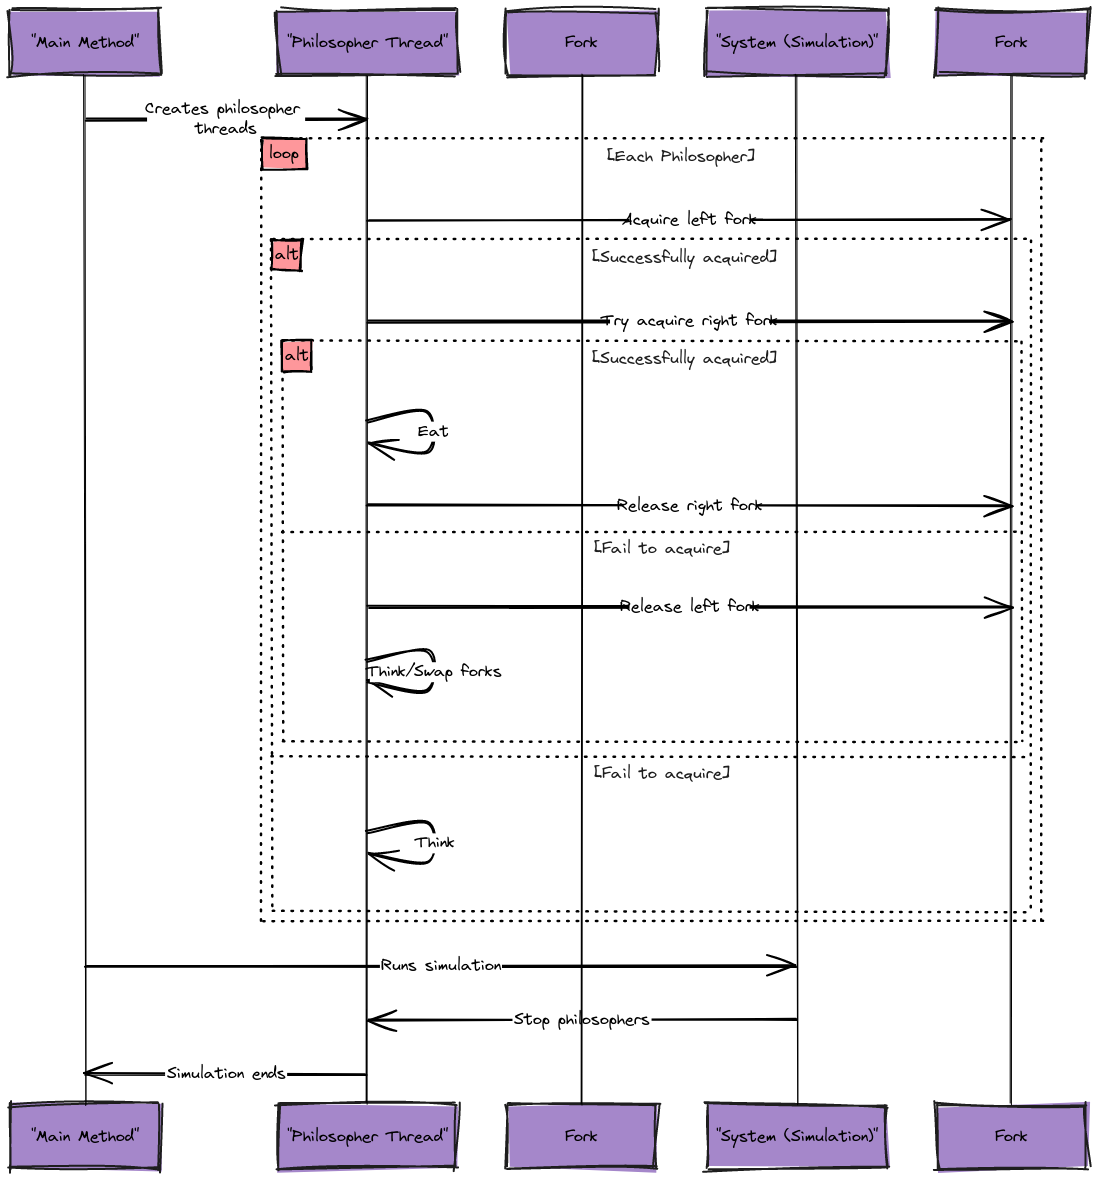

In [ ]:
from threading import *
import random
import time

#inheriting threading class in Thread module
class Philosopher(Thread):
    running = True  #used to check if everyone is finished eating

 #Since the subclass overrides the constructor, it must make sure to invoke the base class constructor (Thread.__init__()) before doing anything else to the thread.
    def __init__(self, index, forkOnLeft, forkOnRight):
        Thread.__init__(self)
        self.index = index
        self.forkOnLeft = forkOnLeft
        self.forkOnRight = forkOnRight

    def run(self):
        while(self.running):
            # Philosopher is thinking (but really is sleeping).
            time.sleep(30)
            print ('Philosopher %s is hungry.' % self.index)
            self.dine()

    def dine(self):
        # if both the semaphores(forks) are free, then philosopher will eat
        fork1, fork2 = self.forkOnLeft, self.forkOnRight
        if self.running:
          while True:
              fork1.acquire() # wait operation on left fork
              locked = fork2.acquire(False) # non-blocking wait call
              if locked: break #if right fork is not available leave left fork
              fork1.release()
              print ('Philosopher %s swaps forks.' % self.index)
              fork1, fork2 = fork2, fork1
        else:
            return
        self.dining()
        #release both the fork after dining
        fork2.release()
        fork1.release()

    def dining(self):
        print ('Philosopher %s starts eating. '% self.index)
        time.sleep(30)
        print ('Philosopher %s finishes eating and leaves to think.' % self.index)

def main():
    forks = [Semaphore() for n in range(5)] #initialising array of semaphore i.e forks

    #here (i+1)%5 is used to get right and left forks circularly between 1-5
    philosophers= [Philosopher(i, forks[i%5], forks[(i+1)%5])
            for i in range(5)]

    Philosopher.running = True
    for p in philosophers: p.start()
    time.sleep(100)
    Philosopher.running = False
    print ("Now we're finishing.")


if __name__ == "__main__":
    main()

Philosopher 0 is hungry.Philosopher 1 is hungry.
Philosopher 1 starts eating. 
Philosopher 2 is hungry.

Philosopher 0 swaps forks.
Philosopher 3 is hungry.
Philosopher 3 starts eating. 
Philosopher 4 is hungry.
Philosopher 1 finishes eating and leaves to think.
Philosopher 2 swaps forks.
Philosopher 0 starts eating. 
Philosopher 3 finishes eating and leaves to think.
Philosopher 4 swaps forks.
Philosopher 2 starts eating. 
Philosopher 1 is hungry.
Philosopher 0 finishes eating and leaves to think.
Philosopher 4 starts eating. 
Philosopher 1 swaps forks.
Philosopher 2 finishes eating and leaves to think.
Philosopher 1 starts eating. 
Philosopher 3 is hungry.
Philosopher 3 swaps forks.
Now we're finishing.


**Exercise**

Use an asymmetric solution to solve the dining-philosopher problem, an odd-numbered philosopher picks up first the left fork and then the right fork while an even-numbered philosopher picks up first the right fork and then the left fork.

In [ ]:
# Asymmetric solution for dining-philosopher problem
from threading import *
import random
import time

#inheriting threading class in Thread module
class Philosopher(Thread):
    running = True  #used to check if everyone is finished eating

 #Since the subclass overrides the constructor, it must make sure to invoke the base class constructor (Thread.__init__()) before doing anything else to the thread.
    def __init__(self, index, forkOnLeft, forkOnRight):
        Thread.__init__(self)
        self.index = index
        self.forkOnLeft = forkOnLeft
        self.forkOnRight = forkOnRight

    def run(self):
        while(self.running):
            # Philosopher is thinking (but really is sleeping).
            time.sleep()
            print ('Philosopher %s is hungry.' % self.index)
            self.dine()

    def dine(self):
        # if both the semaphores(forks) are free, then philosopher will eat
        if self.index % 2 == 0:
          fork1, fork2 = self.forkOnRight, self.forkOnLeft
          print ('Even Philosopher %s swaps Right forks.' % self.index)
        else:
          fork2, fork1 = self.forkOnRight, self.forkOnLeft
          print ('Odd Philosopher %s swaps Left forks.' % self.index)

        if self.running:
          while True:
              fork1.acquire() # wait operation on left fork
              locked = fork2.acquire(False) # non-blocking wait call
              if locked: break #if right fork is not available leave left fork
              fork1.release()
        else:
            return
        self.dining()
        #release both the fork after dining
        fork2.release()
        fork1.release()

    def dining(self):
        print ('Philosopher %s starts eating. '% self.index)
        time.sleep(30)
        print ('Philosopher %s finishes eating and leaves to think.' % self.index)

def main():
    forks = [Semaphore() for n in range(5)] #initialising array of semaphore i.e forks

    #here (i+1)%5 is used to get right and left forks circularly between 1-5
    philosophers= [Philosopher(i, forks[i%5], forks[(i+1)%5])
            for i in range(5)]

    Philosopher.running = True
    for p in philosophers: p.start()
    time.sleep(100)
    Philosopher.running = False
    print ("Now we're finishing.")


if __name__ == "__main__":
    main()

Exception in thread Thread-28:
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
Exception in thread Thread-29:
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/tmp/ipython-input-1989634417.py", line 20, in run
Exception in thread Thread-30:
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/tmp/ipython-input-1989634417.py", line 20, in run
Exception in thread Thread-31:
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
Exception in thread Thread-32:
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/tmp/ipython-input-1989634417.py", line 20, in run
    self.run()
  File "/tmp/ipython-input-1989634417.py", line 20, in run
Type

Philosopher 4 is hungry.Philosopher 0 finishes eating and leaves to think.
Philosopher 1 starts eating. 

Even Philosopher 4 swaps forks.
Philosopher 4 swaps forks.
Philosopher 3 finishes eating and leaves to think.
Philosopher 2 is hungry.
Even Philosopher 2 swaps forks.
Philosopher 2 swaps forks.
Philosopher 4 starts eating. 
Philosopher 3 is hungry.
Odd Philosopher 3 swaps forks.
Philosopher 4 finishes eating and leaves to think.
Philosopher 2 finishes eating and leaves to think.
Philosopher 0 is hungry.
Even Philosopher 0 swaps forks.
Philosopher 0 starts eating. 
Philosopher 3 starts eating. 
Philosopher 0 is hungry.Philosopher 1 finishes eating and leaves to think.
Philosopher 2 starts eating. 

Even Philosopher 0 swaps forks.
Philosopher 0 swaps forks.
Philosopher 3 is hungry.
Odd Philosopher 3 swaps forks.
Philosopher 4 finishes eating and leaves to think.
Philosopher 0 starts eating. 
Philosopher 4 is hungry.Philosopher 2 is hungry.
Even Philosopher 2 swaps forks.

Even Philos

##**Conclusion:**

Synchronization is a crucial concept in concurrent and multi-threaded programming. Its primary purpose is to ensure data consistency and prevent race conditions when multiple threads access shared resources concurrently. While synchronization indeed helps maintain data integrity, it comes with some disadvantages, including increased waiting time for threads and potential performance issues. Let's delve deeper into this topic:

**Advantages of Synchronization:**

1. **Data Consistency:** Synchronization mechanisms like locks, semaphores, and mutexes ensure that shared data is accessed by only one thread at a time. This prevents concurrent threads from modifying data inconsistently, which could lead to incorrect results or program crashes.
2. **Race Condition Prevention:** Synchronization prevents race conditions, which occur when multiple threads try to access and modify shared resources simultaneously. Without synchronization, race conditions can lead to unpredictable and erroneous program behavior.
3. **Orderly Execution:** Synchronization allows you to specify the order in which threads access shared resources. This can be crucial in scenarios where specific operations must occur in a particular sequence.

**Disadvantages of Synchronization:**

1. **Increased Waiting Time:** When a thread acquires a lock or semaphore and other threads need access to the same resource, they must wait until the resource is released. This waiting time can significantly impact the program's performance, especially in highly concurrent systems.
2. **Potential Deadlocks:** Poorly designed synchronization can lead to deadlocks, a situation where threads wait indefinitely for resources that are locked by other threads. Deadlocks can bring the entire application to a standstill.
3. **Reduced Parallelism:** Synchronization often involves blocking or suspending threads, reducing the degree of parallelism in a program. This can result in underutilization of available CPU cores.
4. **Complexity:** Synchronization adds complexity to code, making it harder to design, debug, and maintain. Incorrectly implemented synchronization can lead to subtle and hard-to-diagnose bugs.

**When to Use Synchronization:**

Synchronization should be used when the requirements of your application demand it. You should consider synchronization in scenarios where data consistency and race condition prevention are critical. Some common situations include:
* Shared data structures: When multiple threads access and modify shared data structures like lists, queues, or databases.
* Critical sections: When certain code sections must be executed by only one thread at a time.
* Resource access: When threads need exclusive access to hardware resources, files, or network connections.

**When Not to Use Synchronization:**

Synchronization should be avoided in situations where it's unnecessary or detrimental to performance. In cases of independent tasks that don't share data, synchronization overhead can be avoided.

In summary, synchronization is a powerful tool for ensuring data consistency and preventing race conditions in concurrent programs. However, it comes at the cost of increased waiting times, potential deadlocks, and reduced parallelism. Therefore, it's essential to carefully analyze your application's requirements and use synchronization judiciously where needed while minimizing its impact on performance.

#**References:**

https://www.geeksforgeeks.org/multithreading-python-set-1/

https://www.askpython.com/python/examples/synchronization-in-python

https://dotnettutorials.net/lesson/synchronization-in-python/
